# CSCI 3352 Biological Networks, Spring 2021, Prof. Clauset

# In-class lab : metabolic network structure

***

**Team names**: 

***

This is an in-class "laboratory," in which you will explore the structure of metabolic networks.

***
* [Documentation for networkx](https://networkx.github.io/documentation/stable/)

[//]: <> (Documentation for igraph Python https://igraph.org/python/ )

In [1]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline
import random as rnd
rnd.seed()

Here are three functions that will be useful as you complete this lab

In [2]:
def plot_CCDF(kis):
    # from PS5
    # input : a list of degrees, e.g., from a networkx graph G
    # output: a plot of the CCDF of the degree distribution Pr(K>=k) for k>=1
    
    kmax = max(kis)

    # histogram and plot
    counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
    cumcounts = np.cumsum(counts)
    cumcounts = np.insert(cumcounts,0,0)
    plt.loglog(bins[1:-1], 1-cumcounts[1:-1], 'rs', alpha=0.5)
    plt.xlabel('Degree, k')
    plt.ylabel('Pr(K>=k)')
    plt.show()
    return

def compute_MGD(G):
    # from PS3
    # input : a networkx graph G
    # output: the mean geodesic path length (defined in Lecture 2)

    dij = dict(nx.all_pairs_shortest_path_length(G)) # APSP on G, store as a dictionary (tricky :)

    ells = []                            # list of non-zero and non-infinite lengths
    for node in dij:                     # loop over all the nodes
        temp = list(dij[node].values())  #   get the list of distances
        for length in temp:              #     for each of those distances
            if length>0:                 #     ignore if =0
                ells.append(length)      #     otherwise, add it to ells
                
    ellmean = np.mean(ells)              # MGD = numpy mean of ells list
    return ellmean

In [22]:
def draw_G(G):
    # input : a networkx graph G
    # output: a spring-plot of the network

    print(f'graph with n={G.order()} nodes and m={G.size()} edges:')
    nx.draw_networkx(G,with_labels=True,node_size=600,width=2) # draw it pretty
    limits=plt.axis('off')                                     # turn off axes
    plt.show()
    return

***
## Part 1 : KEGG metabolic networks

In this experiment, you'll explore the structure of a corpus of 109 metabolic networks of various species (mostly bacteria), extracted from the [KEGG database](https://www.genome.jp/kegg/kegg1.html). These networks are in the form of `substrate-product graphs`, meaning that nodes are chemical compounds, and we connect each input (substrate) to each output (product) that it produces in an enzymatic reaction. (See Lecture sketch 9 for what this means.)

* Visit the _Index of Complex Networks_ and find the entry titled `Metabolic networks from KEGG (2006)`.
* Download the .zip file, which contains 109 ".pairs" edgelist files.

#### Part 1,a: Summary statistics
* Pick one of the metabolic networks to work with first. If you'd like to check what kind of organism it is, use a browser query like this `https://www.genome.jp/kegg-bin/show_organism?org=tpa` where `tpa` is the 3-letter code of your organism contained in the file name.
* Compute the standard summary statistics
  * number of nodes $n$
  * (undirected) edges $m$
  * mean degree $\langle k \rangle$
  * clustering coefficient $C$
  * mean geodesic distance $\langle \ell \rangle$
  * a `ridiculogram` of the network, using a spring layout
  * the CCDF of the degree distribution
* Discuss with your teammates whether this network exhibits any noteworthy or unusual statistical patterns based on the above first-level analysis. Record your insights in the markdown box below.

Hint: use the provided functions `draw_G()`, `plot_CCDF()`, and `compute_MGD()`.

In [23]:
G = nx.read_edgelist("kegg2006_metabolic/kegg2006_metabolic/links_afu")

In [24]:
n = len(G.nodes)
m = len(G.edges)
k = 2*m / n
C = nx.transitivity(G)
ell = compute_MGD(G)

print(n, "nodes", m, "edges", k, "mean degree", C, "clustering coefficient", ell, "MGD")

909 nodes 2058 edges 4.528052805280528 mean degree 0.03644229105381554 clustering coefficient 3.50725995695603 MGD


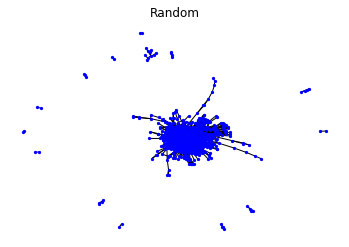

In [36]:
options = {
    'node_color': 'blue',
    'node_size': 5,
    'width': 1
}

plt.title("Random")
nx.draw_spring(G, **options)

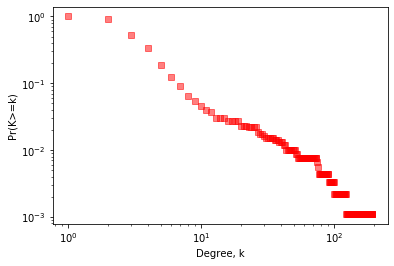

In [37]:
plot_CCDF([G.degree(n) for n in G.nodes()])

Your `Part 1,a` discussion here:

Locally tree-like

****

#### Part 1,b: Edge density null
* Use the same network from `Part 1,a`
* Use a correctly parameterized Erdos-Renyi random graph model $G(n,p)$ to generate null distributions for
  * clustering coefficient $C$
  * mean geodesic distance $\langle \ell \rangle$
* Plot these two distributions, and for each add a vertical line to your plot for the empirical values
* Discuss with your teammates the degree to which _edge density alone_ "explains" the observed properties of your metabolic network.

Hint 1: See your or my solutions for Problem Set 3, and remember that `networkx` has builtin functions for generating ER graphs.

Hint 2: use the `plot_nullAndEmpirical()` function from `PS3` to make the plot.

In [43]:
def plot_nullAndEmpirical(nulls,emp,qlabel,nlabel,elabel,xlim,ylim):
    # input: nulls, a list of values representing a null (reference) distribution
    #        emp, the empirical value to be compared to the null
    #        qlabel [string], the name of the empirical quantity, e.g., '<ell>' or 'C'
    #        nlabel [string], the name of the null data series
    #        elabel [string], the name of the empirical data source
    #        xlim [scalar], the upper limit of the x-axis
    #        ylim [scalar], the upper limit of the y-axis

    counts, bins = np.histogram(nulls,bins=50,range=(0,xlim), density=True)
    nreps = len(nulls)

    fig = plt.figure()
    ax1 = fig.add_subplot(111) # put multiple 
    plt.plot(bins[:-1], counts/100, 'b-', alpha=0.5, label=nlabel)
    plt.plot([emp, emp], [0, ylim], 'r-', alpha=0.5, label=elabel)
    plt.xlabel(qlabel)
    plt.ylabel('Pr('+qlabel+')')
    plt.xlim(0, xlim)
    plt.legend(loc='upper right');
    plt.show()
    
    return

0.004986842296564458


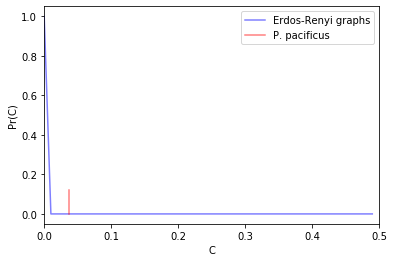

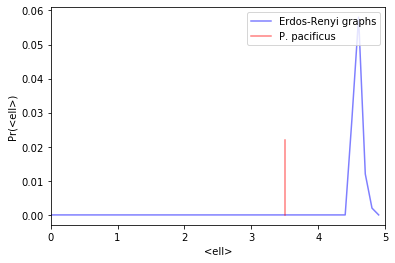

In [44]:
Cs   = []  # store the null values of C here
ells = []  # store the null values of ellmean here
##### do not modify above here #####

p = m / (np.math.factorial(n) / (np.math.factorial(2)*np.math.factorial(n-2)))
print(p)

for i in range(50):
    rG = nx.fast_gnp_random_graph(n, p)
    Cs.append(nx.transitivity(rG))
    ells.append(compute_MGD(rG))



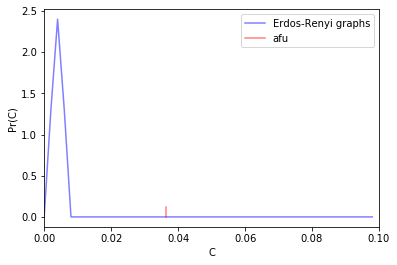

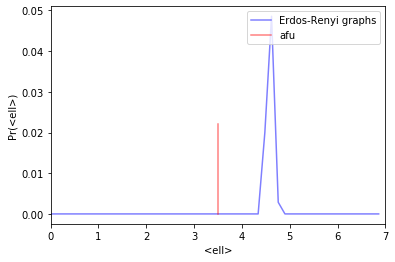

In [46]:
##### do not modify below here #####
plot_nullAndEmpirical(Cs,C,'C','Erdos-Renyi graphs','afu',0.1,0.12)
plot_nullAndEmpirical(ells,ell,'<ell>','Erdos-Renyi graphs','afu',7,0.022)

Your `Part 1,b` discussion here

****

#### Part 1,c: Degree distribution null
* Use the same network from `Part 1,a`
* Use a correctly parameterized Chung-Lu random graph model $G(n,\vec{k})$ to generate null distributions for
  * clustering coefficient $C$
  * mean geodesic distance $\langle \ell \rangle$
* Plot these two distributions, and for each add a vertical line to your plot for the empirical values
* Discuss with your teammates the degree to which _degree structure alone_ "explains" the observed properties of your metabolic network. Contrast this with your answer in `Part 1,b`

Hint: See your or my solutions for Problem Set 3

Your `Part 1,c` discussion here

****

#### Part 1,d: Go big
* Now, import _all 109_ (or as many as you can manage) metabolic networks
* For each, compute and plot a _distribution_ (density histogram) of the following:
  * number of nodes $n$
  * (undirected) edges $m$
  * mean degree $\langle k \rangle$
  * clustering coefficient $C$
  * mean geodesic distance $\langle \ell \rangle$
* Discuss with your teammates what these distributions tell you about the variability of structure in metabolic networks. Record your insights in the markdown box below.

Hint: if you compare bacterial, fungal, plant, and human metabolic networks, can you spot obvious differences?

##### Your `Part 1,d` discussion here

****

#### Part 1,e: Metabolism across the tree of life
* Given the distribution of metabolic network properties from `Part 1,d`, choose a few points that look interesting (unusual) or un-interesting (typical) and look up the corresponding organisms via their three-letter code.
* Formulate a hypothesis about how these statistics may or may not vary across the taxonomic classifications of organisms. For instance, do bacteria have smaller, more compact, more or less triangles, etc. than archea or eukaryotes? Etc.
* Think about how _why_ there might be variations in metabolic network structure across organisms, and how you might further test this hypothesis.

Your `Part 1,e` discussion here

****